### The following script contains the following
#### 1. Import data libraries
#### 2. Input additional requirements
#### 3. Load MNIST data and split training/test
#### 4. Plot images
#### 5. Preprocess input data
#### 6. Preprocess class labels
#### 7. Define model architecture
#### 8. Compile model
#### 9. Fit model on training data
#### 10. Evaluate model on test data


In [1]:
# 1. Import data libraries, additional requirements
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import warnings
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [2]:
# Turning off warning feature
warnings.filterwarnings('ignore')

## 2. Training the model on the MNIST data set

In [3]:
tf.random.set_seed(42)

In [4]:
hand = mnist.load_data()

In [5]:
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [6]:
(X_train, y_train), (X_test, y_test) = hand

In [7]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [10]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

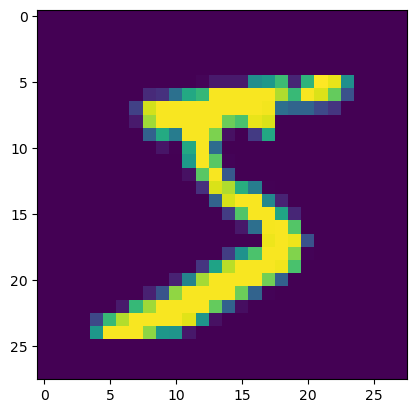

In [11]:
plt.imshow(X_train[0])

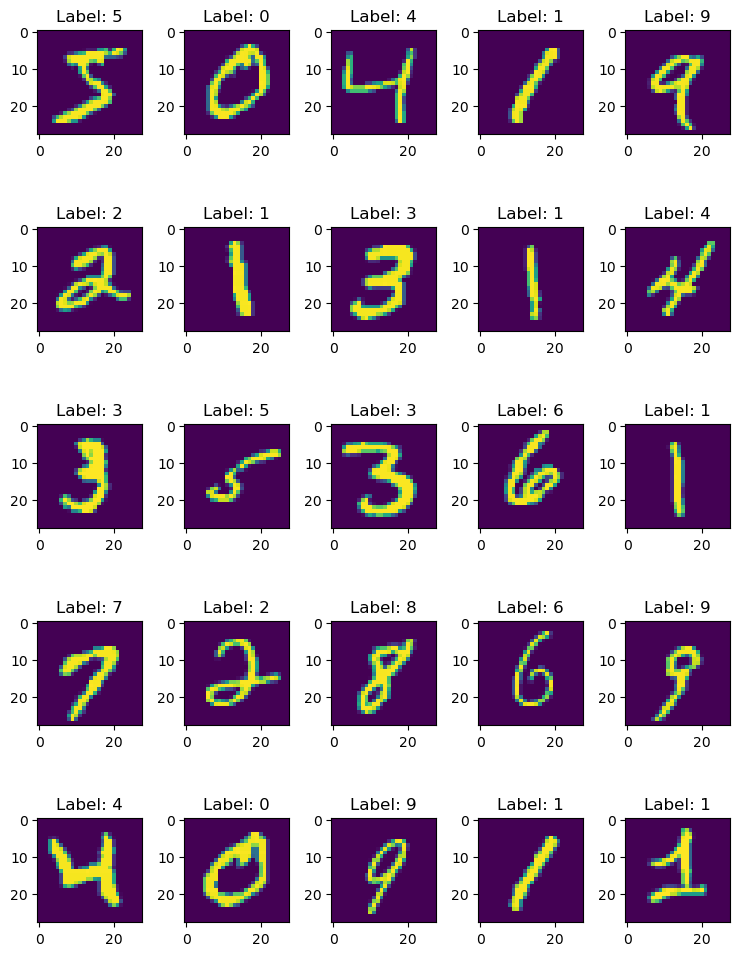

In [12]:
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [13]:
# 5. Preprocess input data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [15]:
X_train /= 255
X_test /= 255

In [16]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)

In [17]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [18]:
for label in range(10):
    one_hot = (Y_train[label]).astype(np.int32)
    print("label: ", label, " in one-hot representation: ", one_hot)

label:  0  in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
label:  1  in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
label:  2  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
label:  3  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  4  in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
label:  5  in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
label:  6  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  7  in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
label:  8  in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
label:  9  in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]


In [19]:
epochs = 30
batch_size = 16
n_hidden = 32

#timesteps = len(X_train[0])
#input_dim = len(X_train[0][0])
#n_classes = _count_classes(Y_train)

# 7. Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# 8. Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
# 9. Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 101s 50ms/step - accuracy: 0.8681 - loss: 0.4177
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 109s 58ms/step - accuracy: 0.9710 - loss: 0.0953
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 51ms/step - accuracy: 0.9784 - loss: 0.0742
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 100s 53ms/step - accuracy: 0.9820 - loss: 0.0573
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 155s 83ms/step - accuracy: 0.9846 - loss: 0.0505
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9871 - loss: 0.0429
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9875 - loss: 0.0398
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9899 - loss: 0.0332
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9890 - loss: 0.0366
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9904 - loss: 0.0293


In [21]:
#  Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 3s - 10ms/step - accuracy: 0.9891 - loss: 0.0381


In [22]:
#predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


array([[4.0145487e-19, 1.0557455e-11, 2.1609654e-12, 9.6088443e-11,
        7.0373287e-16, 2.7362882e-17, 2.6676914e-21, 1.0000000e+00,
        5.2879119e-17, 1.1685508e-10],
       [3.2601706e-12, 3.0654790e-10, 1.0000000e+00, 1.1449591e-14,
        1.1278731e-17, 1.7780797e-17, 9.6776129e-12, 9.3209549e-16,
        6.0089084e-16, 2.4788928e-19],
       [8.6532850e-11, 9.9999881e-01, 1.6060550e-07, 9.7323954e-11,
        4.9419860e-08, 2.4062854e-09, 6.3443530e-08, 9.6848817e-07,
        5.8517946e-09, 2.4139946e-09],
       [9.9996567e-01, 5.3926569e-10, 3.9288584e-06, 9.5327735e-08,
        2.9440287e-07, 3.5386659e-08, 2.8692146e-05, 4.0424943e-08,
        1.3067773e-07, 1.1615466e-06]], dtype=float32)

In [23]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


array([1.       , 1.       , 1.0000001, 1.0000001], dtype=float32)

In [24]:
#actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [25]:
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
[[ 972    0    3    0    0    0    3    1    1    0]
 [   0 1128    3    0    0    0    3    1    0    0]
 [   0    0 1028    1    0    0    0    3    0    0]
 [   0    0    1 1006    0    2    0    0    1    0]
 [   0    0    1    0  958    0    4    0    3   16]
 [   0    0    1    7    0  883    1    0    0    0]
 [   3    1    0    0    1    4  948    0    1    0]
 [   0    0    8    2    0    0    0 1016    1    1]
 [   0    0    3    2    0    1    0    3  963    2]
 [   0    0    2    8    1    6    0    2    1  989]]


## 3. Loading and Pre-processing Handwritten Data

In [26]:
### Import Data
# Define a path for easier importing 
path = r'C:\Users\DELL\Documents\Climatewins\Data'

In [27]:
# Check an image example

img = Image.open(os.path.join(path, 'Prepared/handwritten data/0.png'))
print(img.format)
print(img.size)
print(img.mode)

PNG
(422, 357)
RGBA


In [28]:
newsize = (28,28)
img2 = img.resize(newsize)
img2

In [29]:
testimg = asarray(img2)

In [30]:
from PIL import Image
import numpy as np

# Assuming img is your original image
newsize = (28, 28)
img2 = img.resize(newsize)  # Resize the image

# Convert the image to grayscale (1 channel)
img2 = img2.convert("L")  # "L" mode is for grayscale

# Convert to a NumPy array
testimg = np.asarray(img2)

# Check the new shape
print(testimg.shape)  # Should now be (28, 28)

(28, 28)


In [31]:
# Convert RGBA to RGB (3 channels)
img2 = img.convert("RGB")

# Resize to (28, 28)
img2 = img2.resize(newsize)

# Convert to a NumPy array
testimg = np.asarray(img2)

# Check the new shape
print(testimg.shape)  # Should now be (28, 28, 3)

(28, 28, 3)


In [32]:
# Convert RGBA to grayscale
img2 = img.convert("L")

# Resize to (28, 28)
img2 = img2.resize(newsize)

# Convert to a NumPy array
testimg = np.asarray(img2)

# Check the new shape
print(testimg.shape)  # Should now be (28, 28)

(28, 28)


In [33]:
testimg = testimg.reshape(1, 28, 28, 1)

In [34]:
print(testimg.shape)

(1, 28, 28, 1)


In [35]:
# predict the class
predict_value = model.predict(testimg)
digit = argmax(predict_value)
print(digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
9


In [48]:
# Define the list of numbers (0-9) for the labels
labels = list(range(10))

# Initialize lists to store the image data and labels
images = []
image_labels = []

# Loop through all numbers (0-9) and load corresponding images
for label in labels:
    # Open the image
    img_path = os.path.join(path, 'Prepared/handwritten data', f'{label}.png')
    img = Image.open(img_path)
    
    # Convert the image to grayscale (one single channel)
    img = img.convert('L')
    
    # Resize the image to 28x28
    newsize = (28, 28)
    img_resized = img.resize(newsize)
    
    # Convert the image to a numpy array
    img_array = np.asarray(img_resized)
    
    # Normalize the image data to the range [0, 1]
    img_array = img_array / 255.0
    
    # Reshape to match the CNN input format: (28, 28, 1)
    img_array = img_array.reshape(28, 28, 1)

    # Append the processed image and label to the respective lists
    images.append(img_array)
    image_labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# One-hot encode the labels for CNN training
image_labels = to_categorical(image_labels, num_classes=10)

# Check the shapes of the images and labels
print("Images shape:", images.shape)  # Should be (10, 28, 28, 1) for 10 images
                                      # each resized to 28x28 and with 1 channel (grayscale)
print("Labels shape:", image_labels.shape)  # Should be (10, 10) for 10 images 
                                            #with 10 possible class labels (0-9)

Images shape: (10, 28, 28, 1)
Labels shape: (10, 10)


## 4. Testing with Real Data

In [49]:
# Rename arrays

X_real_test = images  # Your preprocessed handwritten images
y_real_test = labels  # The true labels (0-9) for your handwritten images

In [50]:
# Run the model's predictions on the handwritten data
predictions = model.predict(X_real_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step


In [51]:
# Get the predicted class (the index of the maximum value in the output array)

predicted_labels = np.argmax(predictions, axis=1)

In [52]:
# Calculate accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_real_test, predicted_labels)
print(f"Model accuracy on handwritten data: {accuracy * 100:.2f}%")

Model accuracy on handwritten data: 40.00%


In [53]:
# Display the predicted and true labels

for i, (pred, actual) in enumerate(zip(predicted_labels, y_real_test)):
    print(f"Image {i}: Predicted = {pred}, Actual = {actual}")

Image 0: Predicted = 9, Actual = 0
Image 1: Predicted = 3, Actual = 1
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 3, Actual = 3
Image 4: Predicted = 4, Actual = 4
Image 5: Predicted = 7, Actual = 5
Image 6: Predicted = 5, Actual = 6
Image 7: Predicted = 7, Actual = 7
Image 8: Predicted = 3, Actual = 8
Image 9: Predicted = 2, Actual = 9
